<a href="https://colab.research.google.com/github/altiss/Classification-using-CNN/blob/main/MNIST_Fashion_dataset_Classification_using_Convolutional_Neural_Network_with_dropout_BN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:

# Load the MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
train_data, test_data = fashion_mnist.load_data()

In [98]:
# Divide the data into features and labels.
train_images, y_train = train_data
test_images, y_test = test_data

In [99]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [100]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000,)
Test Labels: (10000,)


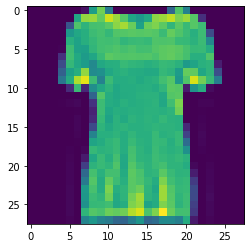

In [101]:
# Show a sample MNIST fashion item.
plt.imshow(train_images[10])
plt.show()

In [102]:
# Define the class names.
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [103]:

# Define the sequential model.
model = tf.keras.models.Sequential()

In [104]:

# Define the network's layes.

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [105]:
# Show the model.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)         

In [106]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
from PIL import Image as im
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test,y_test))

Epoch 1/10
235/235 [==============================] - 67s 281ms/step - loss: 0.7418 - accuracy: 0.7393 - val_loss: 2.1863 - val_accuracy: 0.2807
Epoch 2/10
235/235 [==============================] - 66s 281ms/step - loss: 0.3352 - accuracy: 0.8787 - val_loss: 0.6207 - val_accuracy: 0.7791
Epoch 3/10
235/235 [==============================] - 66s 281ms/step - loss: 0.2905 - accuracy: 0.8949 - val_loss: 0.2906 - val_accuracy: 0.8940
Epoch 4/10
235/235 [==============================] - 66s 280ms/step - loss: 0.2512 - accuracy: 0.9066 - val_loss: 0.3057 - val_accuracy: 0.8922
Epoch 5/10
235/235 [==============================] - 66s 281ms/step - loss: 0.2381 - accuracy: 0.9122 - val_loss: 0.2648 - val_accuracy: 0.9021
Epoch 6/10
235/235 [==============================] - 66s 280ms/step - loss: 0.2243 - accuracy: 0.9180 - val_loss: 0.2850 - val_accuracy: 0.8994
Epoch 7/10
235/235 [==============================] - 66s 280ms/step - loss: 0.2130 - accuracy: 0.9207 - val_loss: 0.2582 - val_ac

In [108]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.2431 - accuracy: 0.9167
Test Accuracy: 0.916700005531311
Test Loss: 0.24308083951473236


In [109]:
# Save the metrics.
metrics = history.history

In [110]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

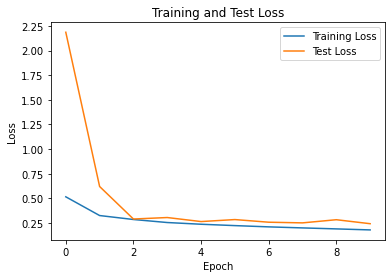

In [111]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [112]:

train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

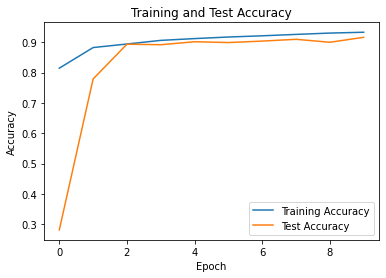

In [113]:

plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

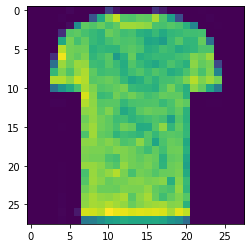

Prediction: T-Shirt/Top


In [114]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

# Choose an index.
index = 125

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

print("Prediction:", class_names[np.argmax(predictions[index])])